## Importing Necessary Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
Zoo_data = pd.read_csv('Zoo.csv')
Zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Understanding

In [3]:
Zoo_data.shape

(101, 18)

In [4]:
Zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
Zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
Zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## Model Building

In [7]:
Zoo_data.drop("animal name",axis=1,inplace = True)

In [8]:
Zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
X=Zoo_data.drop(["type"],axis =1)
y=Zoo_data["type"]

In [10]:
X.shape,y.shape

((101, 16), (101,))

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.20,random_state=12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80,), (21, 16), (21,))

## Model Training,Model Testig,Model Evaluation before Normalization

### Generating Model With K =3

In [12]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=3)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9524


### Generating Model With K =5

In [13]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=5)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9524


## Generating Model With K = 7

In [14]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=7)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9048


In [16]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    zoo_knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = zoo_knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [17]:
cv_scores

[0.9800000000000001,
 0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

In [18]:
neighbours[cv_scores.index(max(cv_scores))]

1

## Rebuild the Model by choosing 1 as the neighrest neighbour

In [19]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=1)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  1.0


## Model Training,Model Testig,Model Evaluation with Normalization

In [20]:
scalar = StandardScaler()
scalar_X = scalar.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(scalar_X,y,test_size=0.20,random_state = 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80,), (21, 16), (21,))

In [22]:
X_train

array([[-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306,  1.13818037]])

In [23]:
X_test

array([[-0.86103386, -0.49690399,  0.84372057, -0.82663978, -0.55829053,
         1.34370962,  0.89642146, -1.2349089 , -2.14734979, -1.95180015,
        -0.29329423, -0.44986771,  2.54951445, -1.69841555, -0.38435306,
         1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, -0.82663978, -0.55829053,
         1.34370962,  0.89642146,  0.80977633,  0.46569032, -1.95180015,
        -0.29329423,  2.22287572, -1.40443503,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771,  0.57253971, -1.69841555,  2.60177454,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1

### Generating Model With  K = 3

In [24]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=3)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9524


### Generating Model With K =5

In [25]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=5)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  1.0


### Generating Model With K =7

In [26]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=7)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9524


## How to pick up optimum number of K?

In [27]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    zoo_knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = zoo_knn_model,X=scalar_X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [28]:
cv_scores

[0.9509090909090909,
 0.93,
 0.9400000000000001,
 0.9200000000000002,
 0.89,
 0.860909090909091,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.8418181818181818,
 0.8218181818181819,
 0.8218181818181819,
 0.7918181818181818,
 0.7918181818181818,
 0.7827272727272728,
 0.7727272727272728,
 0.7327272727272728,
 0.7127272727272727,
 0.6827272727272726,
 0.6727272727272726,
 0.6527272727272726,
 0.6327272727272726,
 0.6127272727272727,
 0.5636363636363637]

In [29]:
neighbours[cv_scores.index(max(cv_scores))]

1

### Vizualizing the K neighbours wrt CV

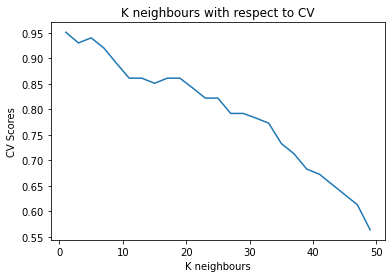

In [30]:
plt.plot(neighbours,cv_scores)
plt.title('K neighbours with respect to CV')
plt.xlabel('K neighbours')
plt.ylabel('CV Scores')
plt.show()

## Rebuild the Model by choosing 1 as the neighrest neighbour

In [31]:
zoo_knn_model = KNeighborsClassifier(n_neighbors=1)
zoo_knn_model.fit(X_train,y_train)
zoo_y_pred = zoo_knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,zoo_y_pred),4))

Accuracy score:  0.9524


#### Insight
* Zoo KNN model was built with different neighbours.
* The best K-neighbour for the model is 1.
* The accuracy score of KNN model without normalization with neighbour 1 is 1.00 that is 100%.
* The accuracy score of KNN model with normalization with neighbour 1 is 0.9524 that is 95.24%.